In [1]:
# Import tensorflow & keras 
import tensorflow as tf
from tensorflow import keras

In [2]:
# Import numpy & matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Show version of tensorflow
print(tf.__version__)

2.3.0


In [4]:
# Import dataset MNIST
fashion_mnist = keras.datasets.fashion_mnist
# put train & test image & label in properties
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# Each image is mapped to a single label
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Explore the train data
train_images.shape

(60000, 28, 28)

In [7]:
# Explore a len of train label
len(train_labels)

60000

In [8]:
# Explore the test data
train_images.shape

(60000, 28, 28)

In [9]:
# Explore a len of test label
len(test_labels)

10000

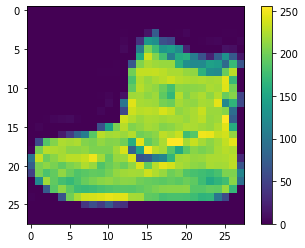

In [10]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [11]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model.
train_images = train_images / 255.0

test_images = test_images / 255.0

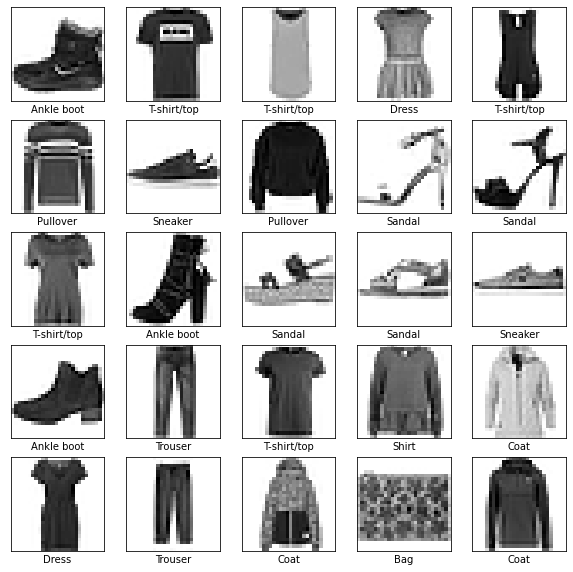

In [12]:
# display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [13]:
# Build the model
# Set up the layers
# Building the neural network requires configuring the layers of the model
# Flatten : this layer reduce a weight of image (28 Pixel)
# Dense : this layer is head layer with n nodes
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [15]:
# Train the model
# The model learns to associate images and labels
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5021 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3768 - accuracy: 0.8619
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3355 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3098 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2930 - accuracy: 0.8911
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2776 - accuracy: 0.8970
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2651 - accuracy: 0.9016
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2545 - accuracy: 0.9056
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2443 - accuracy: 0.9096
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.236

In [16]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3695 - accuracy: 0.8723

Test accuracy: 0.8723000288009644


In [19]:
# Make predictions
# With the model trained, you can use it to make predictions about some images.
# A prediction is an array of 10 numbers.
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([2.82805974e-08, 1.26631015e-11, 1.14988373e-10, 9.00493569e-12,
       1.46470003e-09, 4.39791195e-03, 4.44446968e-09, 4.51266346e-03,
       3.25949571e-07, 9.91088986e-01], dtype=float32)

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

In [22]:
# Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


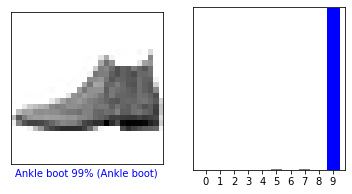

In [23]:
# Verify predictions
# With the model trained, you can use it to make predictions about some images.
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

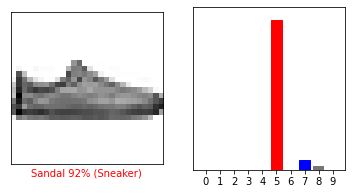

In [24]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

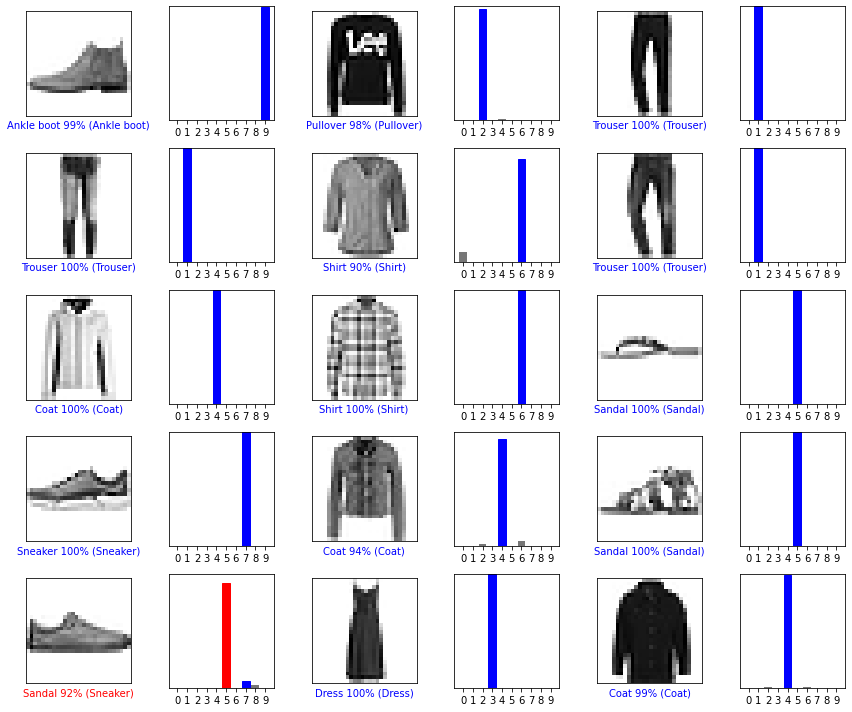

In [25]:
# Let's plot several images with their predictions. Note that the model can be wrong even when very confident.
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()